# Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors, Support Vector Machine Naive Bay’s algorithm, for classification. Analyze their performance. Perform following operations

i)Data preprocessing & clearing ,ii)Exploratory data analysis

iii)Correlation,  iv) Graph of frequent words in spam email

v)Graph of frequent words in non spam email, vi)Graph of accuracy verse models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  # Use GaussianNB for numerical data
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [3]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [4]:
# Check for missing values
df.isnull().sum()

df.drop(['Email No.'],axis=1, inplace=True)

# Fill or drop missing values
df.fillna(df.mean(), inplace=True)   # Example: filling with empty strings

In [5]:
#Exploratory Data Analysis (EDA)
print(df['to'].value_counts())

to
0     1051
1      704
2      544
3      503
4      375
      ... 
55       1
63       1
75       1
85       1
65       1
Name: count, Length: 72, dtype: int64


In [6]:
#Feature Scaling: Standardize or normalize the data for better performance in models like KNN and SVM.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('the', axis=1))  

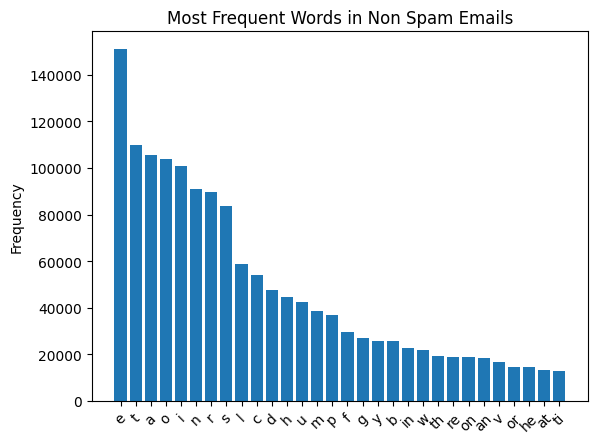

In [7]:
# Assuming 'Prediction' column is the one with non spam labels
non_spam_emails = df[df['Prediction'] == 1]  # Filter out non spam emails where Prediction == 1

# Drop the 'Prediction' column to focus on word columns only
non_spam_emails_words = non_spam_emails.drop(columns=['Prediction'])

# Sum up the word frequencies across all spam emails
word_frequencies = non_spam_emails_words.sum(axis=0)

# Get the top 10 most frequent words
top_10_words = word_frequencies.nlargest(30)

# Plot the top 10 words and their frequencies
import matplotlib.pyplot as plt

plt.bar(top_10_words.index, top_10_words.values)
plt.title('Most Frequent Words in Non Spam Emails')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()


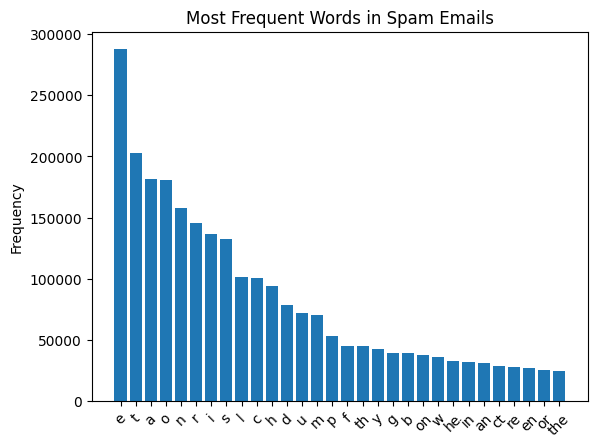

In [8]:
# Assuming 'Prediction' column is the one with spam labels
spam_emails = df[df['Prediction'] == 0]  # Filter out spam emails where Prediction == 0

# Drop the 'Prediction' column to focus on word columns only
spam_emails_words = spam_emails.drop(columns=['Prediction'])

# Sum up the word frequencies across all spam emails
word_frequencies = spam_emails_words.sum(axis=0)

# Get the top 10 most frequent words
top_10_words = word_frequencies.nlargest(30)

# Plot the top 10 words and their frequencies
import matplotlib.pyplot as plt

plt.bar(top_10_words.index, top_10_words.values)
plt.title('Most Frequent Words in Spam Emails')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()


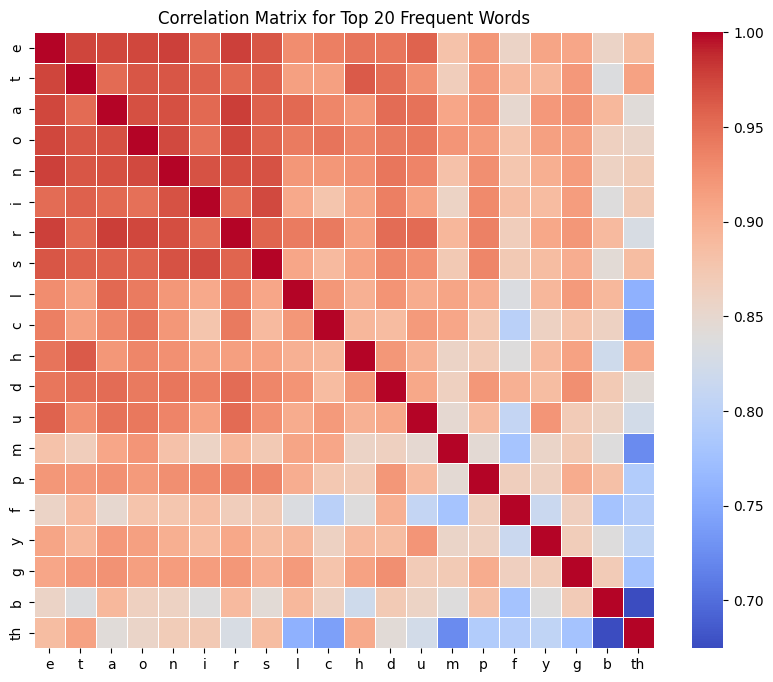

In [9]:
word_data = df.drop(columns=['Prediction'])

word_frequencies = word_data.sum(axis=0)

top_20_words = word_frequencies.nlargest(20).index

top_20_word_data = word_data[top_20_words]

correlation_matrix = top_20_word_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)

plt.title('Correlation Matrix for Top 20 Frequent Words')

plt.show()

In [10]:
df.Prediction.unique()

array([0, 1])

In [11]:
df['Prediction'] = df['Prediction'].replace({0:'Not spam', 1:'Spam'})

In [12]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,Not spam
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,Not spam
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,Not spam
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,Not spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,Not spam
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,Not spam
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,Spam
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,Spam


In [13]:
#Model Training and Evaluation


# 3. Split the data into training and testing sets
X = df.drop("Prediction", axis=1)  # Features
y = df["Prediction"]  # Target variable
print("Features: ",X)
print("Target: ",y)

#X = scaled_features  # Use the scaled features
#y = df['the']  # Replace with your actual label column



Features:        the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
0       0   0    1    0    0   0    2    0    0   0  ...             0   
1       8  13   24    6    6   2  102    1   27  18  ...             0   
2       0   0    1    0    0   0    8    0    0   4  ...             0   
3       0   5   22    0    5   1   51    2   10   1  ...             0   
4       7   6   17    1    5   2   57    0    9   3  ...             0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...           ...   
5167    2   2    2    3    0   0   32    0    0   5  ...             0   
5168   35  27   11    2    6   5  151    4    3  23  ...             0   
5169    0   0    1    1    0   0   11    0    0   1  ...             0   
5170    2   7    1    0    2   1   28    2    0   8  ...             0   
5171   22  24    5    1    6   5  148    8    2  23  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
0            0    0 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
#Train the Models:

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)




KNeighborsClassifier()

In [17]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [19]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [20]:
#Evaluate the Models:
from sklearn.metrics import accuracy_score

knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
nb_pred = nb.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

print(f'KNN Accuracy: {knn_accuracy:.2f}')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')



KNN Accuracy: 0.86
SVM Accuracy: 0.80
Naive Bayes Accuracy: 0.96


In [21]:
knn_report = classification_report(y_test, knn_pred)
svm_report = classification_report(y_test, svm_pred)
nb_report = classification_report(y_test, nb_pred)

In [22]:
print("K-Nearest Neighbors Classification Report:")
print(knn_report)

print("SVM Classification Report:")
print(svm_report)

print("NB Neighbors Classification Report:")
print(nb_report)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

    Not spam       0.92      0.88      0.90       719
        Spam       0.75      0.84      0.79       316

    accuracy                           0.86      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.87      0.86      0.87      1035

SVM Classification Report:
              precision    recall  f1-score   support

    Not spam       0.79      0.97      0.87       719
        Spam       0.87      0.40      0.55       316

    accuracy                           0.80      1035
   macro avg       0.83      0.69      0.71      1035
weighted avg       0.81      0.80      0.77      1035

NB Neighbors Classification Report:
              precision    recall  f1-score   support

    Not spam       0.98      0.96      0.97       719
        Spam       0.91      0.96      0.93       316

    accuracy                           0.96      1035
   macro avg       0.9

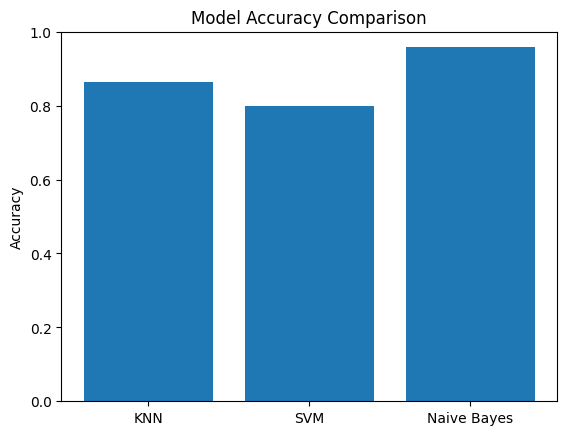

In [23]:
#Graph of Accuracy vs Models
model_names = ['KNN', 'SVM', 'Naive Bayes']
accuracies = [knn_accuracy, svm_accuracy, nb_accuracy]

plt.bar(model_names, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
